In [1]:
import sys
import numpy
import pandas # polars could be more efficient than pandas
import matplotlib
import seaborn
import sklearn
import imblearn

print(f"Python version: {sys.version}")
print(f"Numpy version: {numpy.__version__}")
print(f"Pandas version: {pandas.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {seaborn.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Imbalanced-learn version: {imblearn.__version__}")

Python version: 3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:16:10) [GCC 13.3.0]
Numpy version: 2.1.0
Pandas version: 2.2.2
Matplotlib version: 3.9.2
Seaborn version: 0.13.2
Scikit-learn version: 1.5.1
Imbalanced-learn version: 0.13.0


## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix,r2_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve


In [3]:
df1 = pd.read_csv('creditcard_part1.csv')
df2 = pd.read_csv('creditcard_part2.csv')

# merge dataframes
ccdata = pd.concat([df1, df2], ignore_index=True)

## Splitting data into Train-Val-Test

In [4]:
X = ccdata.drop('Class', axis=1)
y = ccdata['Class']

# 60% training, 20% validation, 20% testing
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=69, stratify=y_trainval)

## Class Distribution

In [5]:
print(f"Normal Transactions in training set (Class = 0):\t{y_train.value_counts()[0]}\t({y_train.value_counts()[0] / len(y_train)*100:.2f}%)")
print(f"Fraudulent Transactions in training set (Class = 1):\t{y_train.value_counts()[1]}\t({y_train.value_counts()[1] / len(y_train)*100:.2f}%)")

Normal Transactions in training set (Class = 0):	170588	(99.83%)
Fraudulent Transactions in training set (Class = 1):	295	(0.17%)


In [6]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
152459,97379.0,1.950375,-0.732294,-1.204485,-0.568751,1.506499,4.067329,-1.619239,1.056602,2.505489,...,-0.125441,-0.114257,-0.055509,0.364732,0.669422,-0.585260,0.462775,-0.020554,-0.049449,15.95
29030,35285.0,-1.277096,0.720290,1.548386,-1.583959,0.429642,-0.486183,1.200975,-0.910433,1.159249,...,0.053414,-0.159649,0.104455,0.006734,0.220794,-0.485440,0.582082,-1.257650,-0.783824,3.84
266992,162570.0,-1.953093,2.452275,-1.803928,-0.492017,-0.811395,-1.168018,-0.523336,1.610733,-0.371818,...,-0.080703,0.511678,1.378317,0.126298,0.039678,-0.598969,-0.215871,0.322854,0.243616,0.89
24229,33129.0,1.082153,-0.866312,-0.053238,-0.715956,-0.630761,-0.007876,-0.314946,0.146180,-1.183627,...,-0.416826,-0.652463,-1.731908,0.265519,-0.356453,-0.274069,0.659969,-0.074283,0.006232,109.98
101714,67924.0,-1.124204,1.348270,1.194636,2.284320,0.067252,-0.321359,0.253380,0.370820,-1.734741,...,-0.183136,0.372637,0.881562,-0.074385,0.575600,-0.330967,0.088572,-0.217583,0.071414,11.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207974,136917.0,1.869056,-1.154602,-0.332423,-0.535551,-0.754819,0.882646,-1.322813,0.406173,1.567844,...,0.056286,0.202157,0.479685,0.112202,-0.229119,-0.631595,1.249636,-0.073262,-0.045109,89.40
149676,91716.0,-0.426645,1.150521,-0.718584,-0.449606,0.791588,-0.304459,0.386818,0.318185,1.050443,...,-0.194367,0.280738,1.059658,-0.005875,0.233779,-0.759491,-0.289300,0.219744,0.232204,6.11
94504,64920.0,-0.599070,-0.167915,0.407592,0.048517,-0.049323,-0.267040,2.012847,-0.512762,-1.124627,...,0.938906,0.267370,0.424559,0.507660,0.074518,-0.349501,1.062907,-0.208762,-0.065034,304.88
275189,166413.0,-3.132341,1.085956,0.600579,-3.376647,-2.266255,-0.051203,-1.816811,2.077354,-0.313069,...,-0.402461,-0.097204,0.001671,-0.270070,-0.436407,0.609699,0.665945,0.103706,-0.008547,30.00


## Scaling the data

In [7]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_val = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)

## Evaluation Metric Function

In [8]:
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test)
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test)
    
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F1 score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)

## Training the KNN model on dataset

In [9]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_scaled_train, y_train)

classifier(knn, X_scaled_train, X_scaled_test, y_train, y_test)

Train accuracy is: 0.9996254747400268
Test accuracy is: 0.9994908886626171

Train ROC is: 0.8915254237288135
Test ROC is: 0.8673205600473165

F1 score is: 0.8323699421965318
Precision is: 0.96
Recall is: 0.7346938775510204


## Training the SVM model on dataset

In [10]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_scaled_train, y_train)
        
classifier(svm, X_scaled_train, X_scaled_test, y_train, y_test)

Train accuracy is: 0.9996664384403364
Test accuracy is: 0.9993504441557529

Train ROC is: 0.906773798939898
Test ROC is: 0.8265042335167042

F1 score is: 0.7757575757575758
Precision is: 0.9552238805970149
Recall is: 0.6530612244897959


## Learning Curve for KNN

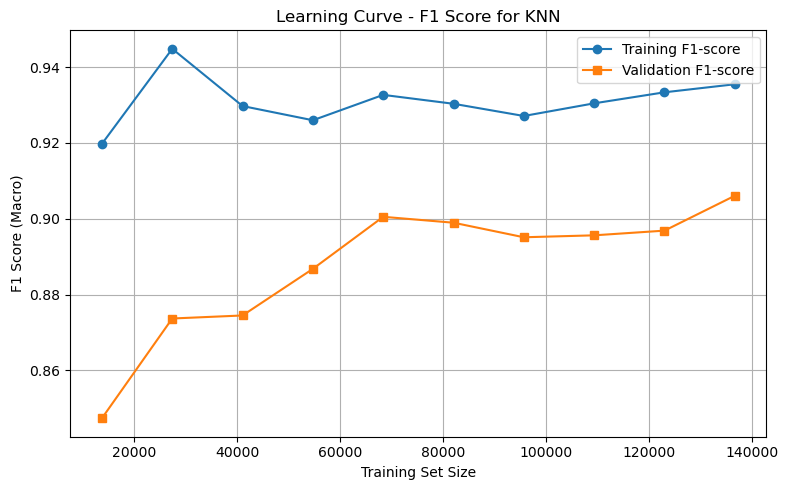

In [11]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=knn,
    X=X_scaled_train,
    y=y_train,
    cv=StratifiedKFold(n_splits=5),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_macro',
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training F1-score')
plt.plot(train_sizes, val_mean, 's-', label='Validation F1-score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score (Macro)')
plt.title('Learning Curve - F1 Score for KNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Observations for above KNN Learning Curve:
1. The training F1-score starts high (~0.92) and remains relatively stable as more data is added.
2. The validation F1-score starts lower (~0.85) but steadily improves with more data, reaching above 0.90.
3. The gap between training and validation scores narrows as the dataset grows, suggesting reduced overfitting.


## Learning Curve for SVM

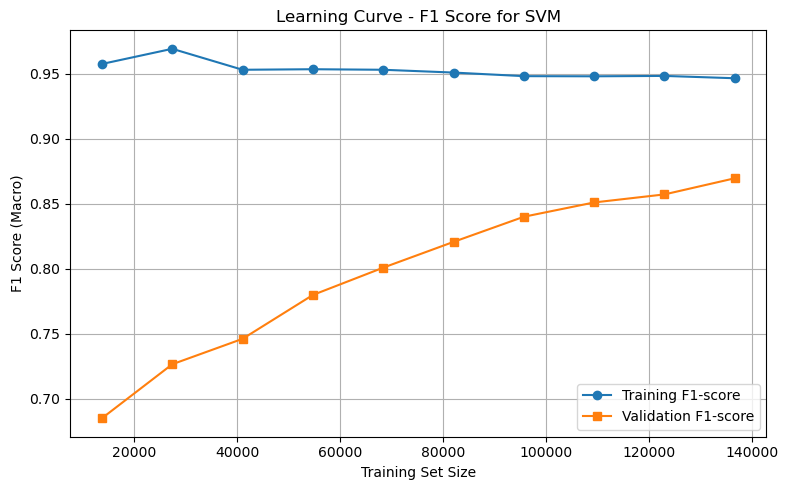

In [12]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm,
    X=X_scaled_train,
    y=y_train,
    cv=StratifiedKFold(n_splits=5),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_macro',
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training F1-score')
plt.plot(train_sizes, val_mean, 's-', label='Validation F1-score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score (Macro)')
plt.title('Learning Curve - F1 Score for SVM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Observations for above SVM Learning Curve:
1. The training F1-score starts high (~0.95) and remains relatively stable as more data is added.
2. The validation F1-score starts lower (~0.69) but steadily improves with more data, reaching above 0.87.
3. The gap between training and validation scores narrows as the dataset grows, suggesting reduced overfitting.
